# Playing around with the Tara DB

In [34]:
# imports
from importlib import reload
import pandas

from matplotlib import pyplot as plt

from oceancolor.tara import io
from oceancolor.tara import spectra

# Load the DB

In [3]:
tara_db = io.load_tara_db()

In [4]:
tara_db.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot one spectrum

In [38]:
reload(io)
reload(spectra)
wv, ap, sig = spectra.spectrum_from_row(tara_db.iloc[0])
wv, cp, sig_cp = spectra.spectrum_from_row(tara_db.iloc[0], flavor='cp')

ValueError: x and y must have same first dimension, but have shapes (81,) and (578,)

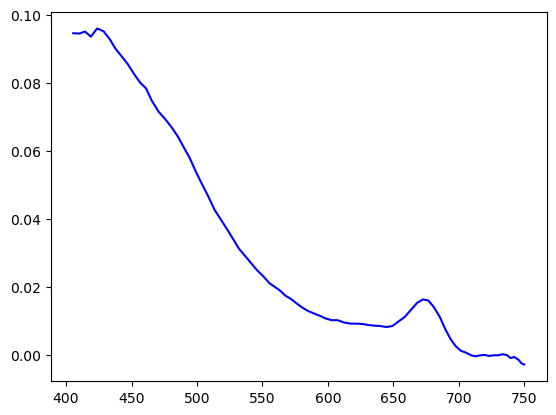

In [39]:
plt.clf()
ax = plt.gca()

# ap
ax.plot(wv,ap, color='b', label='ap')
ax.plot(wv, sig, 'b--', label=r'$\sigma_{\rm ap}$')

# cp
scl = 10.
ax.plot(wv,cp/scl, color='r', label=f'cp/{scl}')
ax.plot(wv, sig_cp/scl, 'r--', label=r'$\sigma_{\rm cp}$'+f'/{scl}')


#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Absorption (m$^{-1})$')

ax.legend()